## Fama French 3 Factor Model

Yan Wu<br/>
yanwu26@gmail.com <br/>
October 2016

#### Description:

In asset pricing and portfolio management the Fama–French three-factor model is a model designed by Eugene Fama and Kenneth French to describe stock returns. The three factors are 1. company Size, 2. company Price-to-Book Ratio, and 3. Market Risk.
The traditional asset pricing model, known formally as the capital asset pricing model (CAPM) uses only one variable to describe the returns of a portfolio or stock with the returns of the market as a whole. In contrast, the Fama–French model uses three variables. 

Fama and French started with the observation that two classes of stocks have tended to do better than the market as a whole: (i) small caps and (ii) stocks with a low Price-to-Book ratio (P/B, customarily called value stocks, contrasted with growth stocks). They then added two factors to CAPM to reflect a portfolio's exposure to these two classes.


For this scenario, we've chosen the FMI International Fund (FMIJX) as the fund and MSCI ACWI ex US as the benchmark (ACWX)

All data, tools, and code are publicly available. No guarantee of data accuracy.


In [25]:
import pandas as pd
import numpy as np
from io import StringIO
from zipfile import ZipFile
from urllib.request import urlopen
from pandas_datareader import data as wb
from datetime import datetime, timedelta
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
params = {'legend.fontsize': 'x-large','figure.figsize': (15, 10),'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}#,'axes.facecolor': 'white'}
pylab.rcParams.update(params)

In [26]:
df_ff = pd.read_csv('F-F_Research_Data_Factors.CSV', header = 0, 
                    names = ['asof_dt','MKT-RF','SMB','HML','RF'], skiprows=3).dropna()
df_ff['asof_dt'] = pd.to_datetime(df_ff['asof_dt'], format = "%Y%m")
df_ff=df_ff.set_index('asof_dt', drop=True)
df_ff.index = df_ff.index.map(lambda x: x.strftime('%Y-%m'))
df_ff.head(3)

,MKT-RF,SMB,HML,RF
1926-07,2.96,-2.30,-2.87,0.22
1926-08,2.64,-1.40,4.19,0.25
1926-09,0.36,-1.32,0.01,0.23


In [27]:
#Get Data from Yahoo
start = '2005-01-01'
end = '2016-06-01'

df_px = wb.get_data_yahoo('VWELX', start, end, interval='m')
df_px.index = df_px.index.map(lambda x: x.strftime('%Y-%m'))
df_px['ret']=df_px['Adj Close'].pct_change().dropna()
#df_px['LnReturn'] = np.log(df_px['Adj Close']) - np.log(df_px['Adj Close'].shift(1))
df_px.head(3)

,Open,High,Low,Close,Volume,Adj Close,ret
2005-01,29.980000,29.98,29.490000,29.809999,0,16.531027,NaN
2005-02,29.969999,30.65,29.969999,30.500000,0,16.913664,0.023147
2005-03,30.580000,30.90,29.500000,29.830000,0,16.653324,-0.015392


In [28]:
#Combine Datasets, and calculate excess return

df_tot=pd.concat([df_ff,df_px['ret']], axis=1).dropna()
df_tot['ret_excess']=100*df_tot['ret'] - df_tot['RF']
#data2['XRtrn'] = (data2['LnReturn']*100 - data2['RF'])
df_tot.tail(3)

,MKT-RF,SMB,HML,RF,ret,ret_excess
2016-04,0.91,0.68,3.25,0.01,0.014493,1.439273
2016-05,1.78,-0.27,-1.79,0.01,0.007937,0.783655
2016-06,-0.04,0.61,-1.49,0.02,0.000787,0.058748


                            OLS Regression Results                            
Dep. Variable:             ret_excess   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     728.2
Date:                Mon, 28 Nov 2016   Prob (F-statistic):           2.60e-82
Time:                        09:23:45   Log-Likelihood:                -138.69
No. Observations:                 137   AIC:                             285.4
Df Residuals:                     133   BIC:                             297.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1512      0.058      2.586      0.0

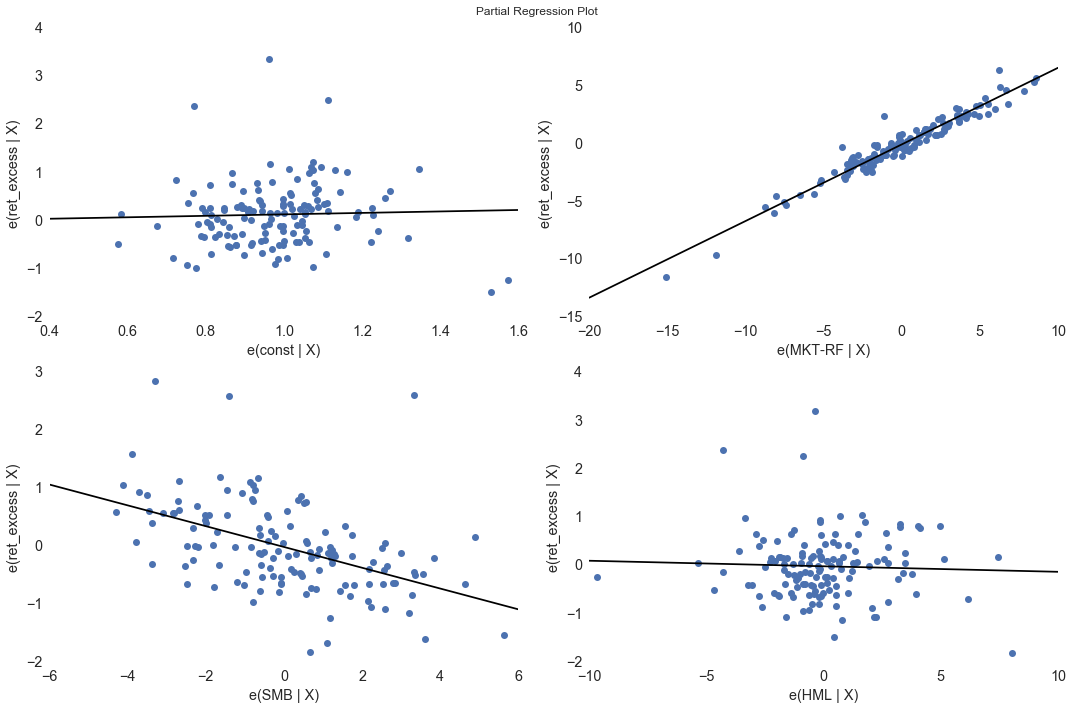

In [29]:
y = df_tot['ret_excess']
X = df_tot.ix[:,[0,1,2,]]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

#print model results and plot 
print(results.summary())
fig = plt.figure(figsize=(20,10))
#fig = sm.graphics.plot_partregress_grid(results, fig = fig)
fig = sm.graphics.plot_partregress_grid(results)
